# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sci
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/abikumar/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


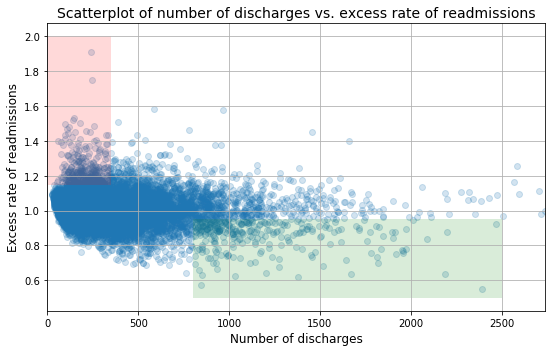

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
#Further cleaning
df = clean_hospital_read_df

print("Number of NaN's:\n", df.isnull().sum())

#Drop NaN's in df
df.dropna(subset=['Excess Readmission Ratio',
                  'Predicted Readmission Rate',
                  'Expected Readmission Rate',
                  'Number of Readmissions'], 
          inplace=True)

Number of NaN's:
 Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64


## A. Do I agree with the above analysis and recommendations?

<blockquote>
**A. Initial observations based on the plot above**
<li> Overall, rate of readmissions is trending down with increasing number of discharges </li>
<li> With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red) </li>
<li> With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) </li> 
</blockquote>

First, this plot is too cluttered and does not really provide much meaningful information. Regarding the rate of readmissions, the graph does not display a large enough downward trend for us to conclude that there even is a trend. The highest rate of readmissions do appear to be located in hospitals with a lower number of discharges. Meanwhile, the lowest rate of readmission does not appear to be unique to those with the highest number of discharges.

<blockquote>
**B. Statistics**
<li> In hospitals/facilities with number of discharges &#60; 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 </li>
<li> In hospitals/facilities with number of discharges &#62; 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 </li>
</blockquote>

I verify these statistics below.

In [6]:
# Filter df to hospitals/facilities with discharges < 100
df_100 = df[df['Number of Discharges'] < 100]
print("Hospitals/Facilities with discharges < 100:\n", 
      "Mean:", round(df_100['Excess Readmission Ratio'].mean(),3),"\n",
      "Readmission Rate greater than 1:", round(sum(df_100['Excess Readmission Ratio'] > 1)/len(df_100),2)*100, "%\n"
     )

#Filter df to hospitals/facilities with discharges > 1000
df_1000 = df[df['Number of Discharges'] > 1000]
print("Hospitals/Facilities with discharges > 1000:\n", 
      "Mean:", round(df_1000['Excess Readmission Ratio'].mean(),3),"\n",
      "Readmission Rate greater than 1:", round(sum(df_1000['Excess Readmission Ratio'] > 1)/len(df_1000),2)*100, "%"
     )

Hospitals/Facilities with discharges < 100:
 Mean: 1.023 
 Readmission Rate greater than 1: 63.0 %

Hospitals/Facilities with discharges > 1000:
 Mean: 0.978 
 Readmission Rate greater than 1: 44.0 %


<blockquote> **C. Conclusions**
<li> There is a significant correlation between hospital capacity (number of discharges) and readmission rates. </li>
<li> Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions. </li> </blockquote>

I verify these results below.

In [7]:
print("r =",np.corrcoef(df['Number of Discharges'],df['Excess Readmission Ratio'])[0,1])

r = -0.09739794351079353


While there is a negative correlation between the two values, it is quite small. The value could be statistically significant, but it's not intuitively significant. The wording of the given conclusion is vague.

<blockquote>
**D. Regulatory policy recommendations**
<li> Hospitals/facilties with small capacity (&#60; 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
<li> Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
</blockquote>

These recommendations are given without proper analysis. In the conclusion section an assumption is made regarding performance of smaller hospitals. There is no proof that it is optimal to focus on hospitals with capacity < 300. There is also no gaurantee that these small hosptials are unable to perform proper care, they may be specialized facilities that are in fact providing quality care, but naturally have a higher remittance rate. 

With the analysis provided the only recommendations that should be made are: find a way to weigh optimize funding going to regulating hosptials that require it, and to continue researching while controlling for specializations and other factors to determine which hospitals policies should target.

## B.  My Analysis

In [8]:
df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

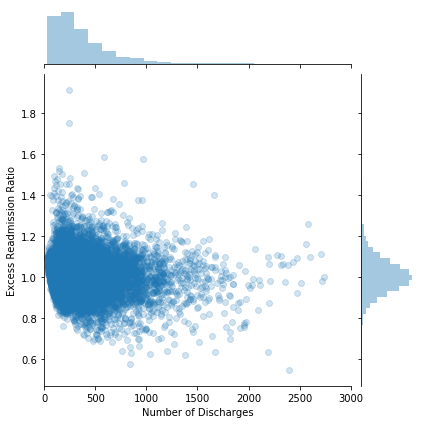

In [9]:
sns.jointplot('Number of Discharges','Excess Readmission Ratio', data=df, xlim=(0,3000), alpha = 0.2)
plt.show()

There appears to be more hospitals/facilities with a lower number of discharges. It might be worth exploring how the readmission ratio is calculating while controlling for hospital size.

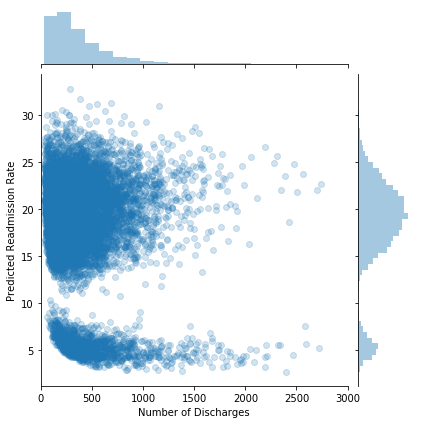

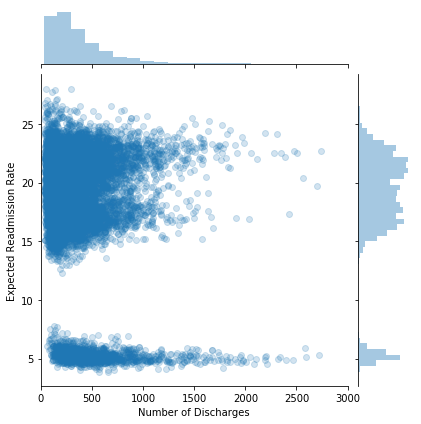

In [10]:
sns.jointplot('Number of Discharges','Predicted Readmission Rate', data=df, xlim=(0,3000), alpha = 0.2)
plt.show()
sns.jointplot('Number of Discharges','Expected Readmission Rate', data=df, xlim=(0,3000), alpha = 0.2)
plt.show()

The data appears to separate. I think I has something to do with measure name; my guess is that this has to do with how the predicted and expected readmission rates are calculated.

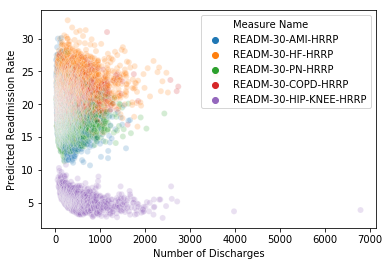

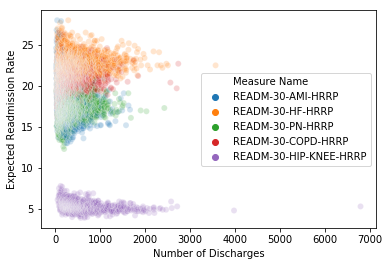

In [14]:
sns.scatterplot('Number of Discharges','Predicted Readmission Rate', data=df, alpha = 0.2, hue="Measure Name")
plt.show()
sns.scatterplot('Number of Discharges','Expected Readmission Rate', data=df, alpha = 0.2, hue="Measure Name")
plt.show()

It seems that the READM-30-HIP-KNEE-HRRP has a higher rate of readmission than the other groups. Since both the expected and the predicted rates are lower, it should not have a major impact on the excess readmissions ratio. It would be worth running a hypothesis test on each individual group to see if there is still a correlation between discharges and readmission rate for all groups.

Hypothesis:
* H<sub>0</sub>: r<sub>Measure</sub> = 0
* H<sub>a</sub>: r<sub>Measure</sub> $\neq$ 0

In [17]:
df.groupby("Measure Name").apply(lambda a: sci.pearsonr(a['Number of Discharges'],a['Excess Readmission Ratio']))

Measure Name
READM-30-AMI-HRRP          (-0.1451337598760128, 7.931040642113525e-10)
READM-30-COPD-HRRP        (0.10736626870979389, 1.9049127925133036e-08)
READM-30-HF-HRRP            (-0.032867626739977396, 0.0802719006157813)
READM-30-HIP-KNEE-HRRP     (-0.3502044441798684, 7.784966842321882e-41)
READM-30-PN-HRRP             (0.02473811875623645, 0.19153263317384694)
dtype: object

The first values are the pearson r coefficient and the second values are the p-value of the coefficient. We can reject the null for AMI, COPD, and HIP-KNEE, but there are two groups with a p-value greater than .01. We fail to reject for HF and PN. This test proves that not all hospitals/facilities behave the same regarding size and readmittance.


This changes my recommendations in the following ways:
* Further study the prediction methodology for AMI and HIP-KNEE, if the methodology holds up then target smaller facilities in order to improve their quality
* For the COPD group, check methodology and then target larger facilities to improve their quality
* It would be worth verifying the methodology for PN and HF

The original plot provided groups all the data and gives no-way to distinguish the nuance or weight of the dataset. I believe the graphs should be separated by groups.

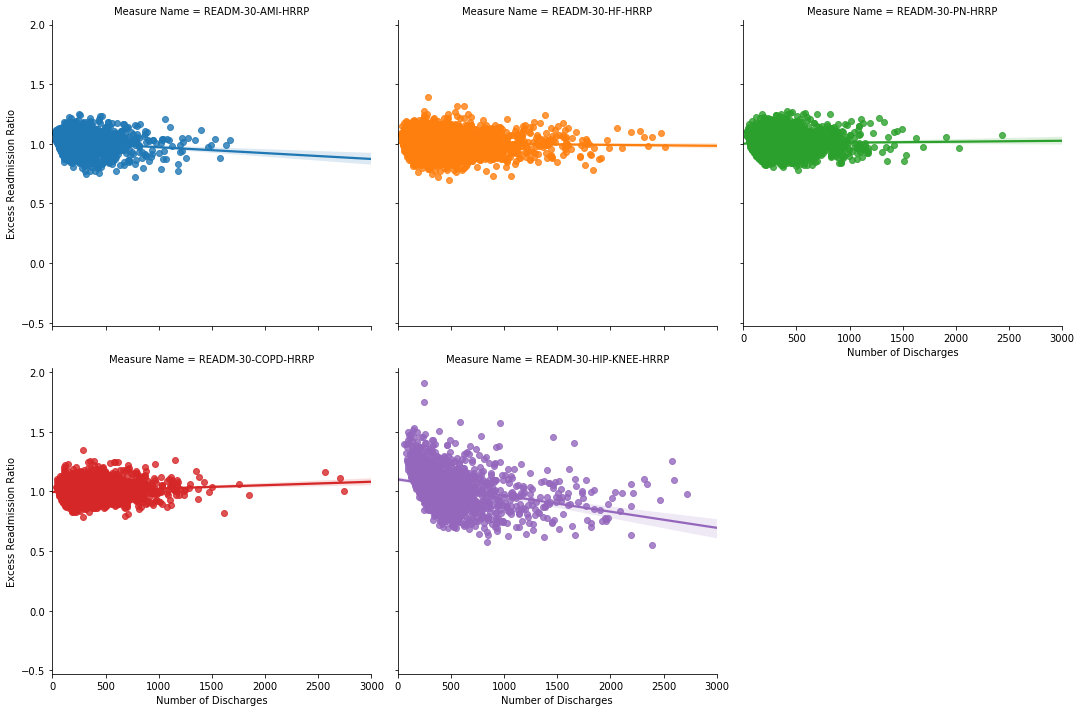

In [39]:
_ = sns.lmplot('Number of Discharges','Excess Readmission Ratio', data=df, 
           col="Measure Name", hue="Measure Name", col_wrap=3)
_.set(xlim=(0,3000))
plt.show()